In [1]:
import pandas as pd
from datasets import load_dataset

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

## Merge

* Merging data jobs in india with software jobs in india

In [2]:
#dataset for datajobs from last exercise

df_india = df[df["job_country"] == 'India'].copy()
df_india['job_posted_month'] = df_india['job_posted_date'].dt.strftime('%B')
df_india_pivot = df_india.pivot_table(index='job_posted_month', columns='job_title_short',aggfunc='size')
df_india_pivot.reset_index(inplace=True)
df_india_pivot['month_no'] = pd.to_datetime(
    df_india_pivot['job_posted_month'], format='%B').dt.month
df_india_pivot.sort_values('month_no', inplace=True)
df_india_pivot.set_index('job_posted_month', inplace=True)
df_india_pivot.drop(columns='month_no', inplace=True)

In [3]:
#dataset for software jobs in india
df_india_software_pivot= pd.read_csv("sample_data/software_jobs.csv", index_col='job_posted_month')

In [4]:
df_india_merged = df_india_pivot.merge(right=df_india_software_pivot, on='job_posted_month')
df_india_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192,13619,9827,5108,4348
February,143,35,433,1631,932,42,94,313,165,157,11456,9116,7298,4284
March,116,37,422,1591,1005,34,96,351,194,180,11102,8178,5814,4159
April,170,32,418,1566,946,54,86,375,194,169,14037,9209,7232,4220
May,103,14,278,1384,837,31,59,329,134,98,12126,8864,6718,4980
June,146,26,367,1632,1129,41,66,427,238,125,12003,8065,5902,4781
July,142,25,457,1528,1123,54,75,359,204,155,11914,8061,6839,4344
August,189,25,618,1407,1157,47,126,343,235,148,11571,8191,7413,4104
September,155,34,630,1508,984,67,85,324,195,132,14016,8447,6139,4094


In [5]:
top_5 = (
    df_india_merged.sum()               #sum all rows for each column
    .sort_values(ascending=False)
    .head()
    .index                              #take only index
    .to_list()
)
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

In [6]:
df_india_merged[top_5]

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer,Data Engineer
job_posted_month,,,,,
January,13619,9827,5108,4348,2132
February,11456,9116,7298,4284,1631
March,11102,8178,5814,4159,1591
April,14037,9209,7232,4220,1566
May,12126,8864,6718,4980,1384
June,12003,8065,5902,4781,1632
July,11914,8061,6839,4344,1528
August,11571,8191,7413,4104,1407
September,14016,8447,6139,4094,1508


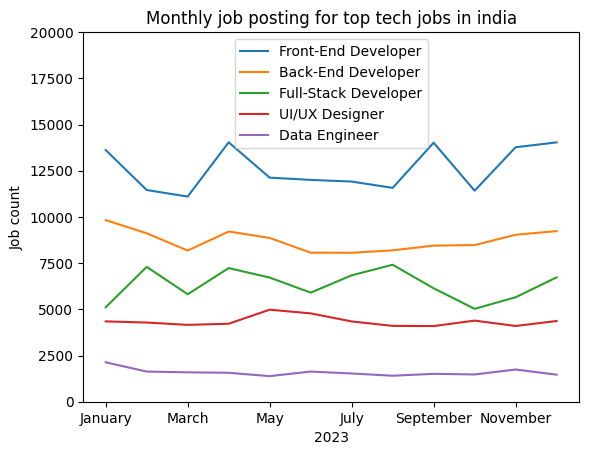

In [7]:
from matplotlib import pyplot as plt


df_india_merged[top_5].plot(kind='line')
plt.title("Monthly job posting for top tech jobs in india")
plt.xlabel("2023")
plt.ylabel("Job count")
plt.ylim(0,20000)
plt.legend()
plt.show()

## Concat

In [8]:
df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


* Add a new column `job_posted_month` based on month.
* Based on months make 12 different duplicate dataframes and concat one of the dataframe to the orginal.

In [9]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')
df['job_posted_month']

0         Jun
1         Jan
2         Oct
3         Jul
4         Aug
         ... 
785736    Mar
785737    Mar
785738    Mar
785739    Mar
785740    Mar
Name: job_posted_month, Length: 785741, dtype: object

* Assigning each dataframes to each month using Dict comprehension.
* for ex:  
 ```python
        dict_months={
                'jan': df_jan,
                'feb': df_feb,
                ...
                'dec': df_dec
            }

In [10]:
months = df['job_posted_month'].unique()
months

array(['Jun', 'Jan', 'Oct', 'Jul', 'Aug', 'Nov', 'Mar', 'Dec', 'Apr',
       'Feb', 'Sep', 'May'], dtype=object)

In [11]:
dict_months={month: df[df['job_posted_month']==month
           ] for month in months}

In [12]:
dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,Jan


### Concat 'Jan','Feb','Mar' 
  Quarter-1 of 2023

In [13]:
df_q1=pd.concat([dict_months['Jan'], dict_months['Feb'],dict_months['Mar']],ignore_index=True)

<Axes: xlabel='job_posted_month'>

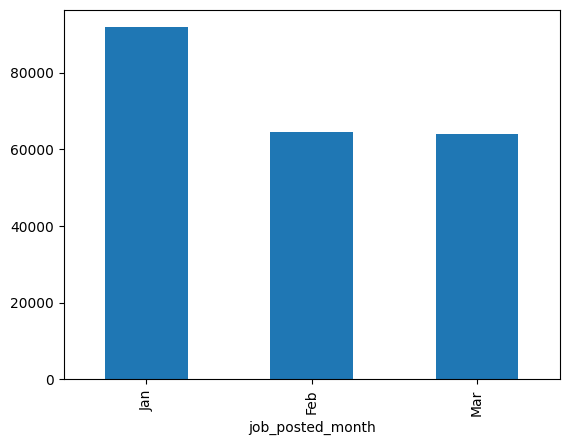

In [14]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')